In [1]:
import pandas as pd
import cairo
import numpy as np
import math
import networkx as nx
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
# create attribute list
# easy for this file because the first 6 columns are in fact attribute list
attr_list = pd.read_csv('HTTLPR.csv', usecols=[0, 1, 2, 3, 4, 5])
attr_list['PaperID'] = attr_list.index

In [3]:
# create edge list
matrix = pd.read_csv('HTTLPR.csv')
matrix = matrix.iloc[:, 6:]

In [4]:
# search_for_alias
search_dict = pd.Series(attr_list['PaperID'].values, index=attr_list['Study']).to_dict()
search_dict_reverse = pd.Series(attr_list['Study'].values, index=attr_list['PaperID']).to_dict()
matrix.columns = [search_dict[x] for x in matrix.columns]

In [5]:
#g = nx.generators.directed.kamada_kawai_layout(75, 3, 0.5)
g = nx.generators.directed.random_k_out_graph(75, 3, 0.5)
pos = nx.layout.spring_layout(g)

In [6]:
#node_sizes = [10 + i for i in range(len(g))]
M = g.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [i for i in range(M)]

In [7]:
study = attr_list['Study'].to_list()
outcome = attr_list['Outcome'].to_list()

In [16]:
for node in g:
    print(node)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


In [12]:
coloring = []
for node in g:
    if node < 0.1:
        coloring.append('pink')
    elif node > 0.9:
        coloring.append('green')
    else:
        coloring.append('blue')

In [13]:
labelss = {}
for i, val in enumerate(study):
    labelss[i] = val

In [14]:
edge_list = []
for i in range(0, matrix.shape[0]):
    for j in range(0, matrix.shape[1]):
        if isinstance(matrix.iloc[i, j], str):
            s = matrix.iloc[i, j]
            if s.replace(" ", "") == "X":
                edge_list.append((i, j))

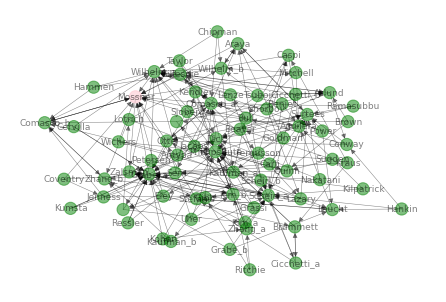

In [15]:
nx.draw(
    g,
    labels=labelss,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5,
    node_color=coloring
)

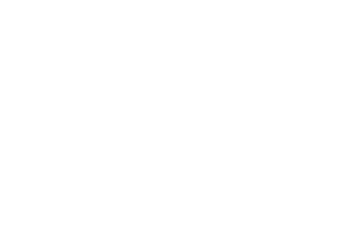

In [12]:
ax = plt.gca()
ax.set_axis_off()
plt.show()

<BarContainer object of 0 artists>

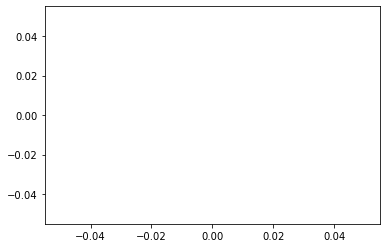

In [13]:
degree_ratio = pd.DataFrame(columns=['paperID','degree_ratio'])
plt.bar(degree_ratio['paperID'], degree_ratio['degree_ratio'], width=0.80, color="b")

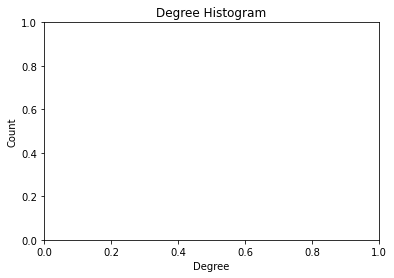

In [14]:
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()